In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score





#determine the most important features for predict 

In [52]:
df = pd.read_csv('df_cleaned_for_ML_regression.csv')
df = df.dropna()
df.head()

,name,district,latitude,longitude,year_built,proj_area,nbr_buildings,nbr_floors,units,hospital,...,tran_name1,tran_name2,tran_name3,tran_name4,tran_name5,dist_tran_1,dist_tran_2,dist_tran_3,dist_tran_4,dist_tran_5
0,101 Mansion,Bang Kapi,13.787435,100.631564,1991,23371,5,5,834.0,2.10,...,Lat Phrao Toll Plaza,Yothin Phatthana Toll Plaza,Pracha Uthit Toll Plaza,Sutthisan,Huai Khwang,4.3,4.8,5.0,8.1,8.3
1,624 Condolette Ladprao,Bang Kapi,13.766348,100.649395,2011,6476,2,8,471.0,1.80,...,Lat Phrao Toll Plaza,Srinagarindra Toll Plaza,Pracha Uthit Toll Plaza,Huai Khwang,Thailand Cultural Centre,5.8,6.2,6.5,9.8,9.9
2,Adamas Ramkhamhaeng,Bang Kapi,13.752448,100.615507,1995,4699,1,16,140.0,2.30,...,Srinagarindra Toll Plaza,Ramkhamhaeng Toll Plaza,Phatthanakan 2 Toll Plaza,Phra Khanong,Ekkamai,2.1,2.5,2.9,6.1,6.3
3,Aspire Ladprao 113,Bang Kapi,13.770286,100.638799,2016,3816,1,8,270.0,0.68,...,Lat Phrao Toll Plaza,Pracha Uthit Toll Plaza,Srinagarindra Toll Plaza,Sutthisan,Huai Khwang,4.7,5.4,6.1,8.5,8.7
4,B.R. Condo,Bang Kapi,13.768706,100.638876,1991,7391,2,10,560.0,0.69,...,Lat Phrao Toll Plaza,Pracha Uthit Toll Plaza,Srinagarindra Toll Plaza,Sutthisan,Huai Khwang,4.7,5.4,6.1,8.5,8.6


In [53]:
le = LabelEncoder()
df['district'] = le.fit_transform(df['district'])
df.head()

,name,district,latitude,longitude,year_built,proj_area,nbr_buildings,nbr_floors,units,hospital,...,tran_name1,tran_name2,tran_name3,tran_name4,tran_name5,dist_tran_1,dist_tran_2,dist_tran_3,dist_tran_4,dist_tran_5
0,101 Mansion,0,13.787435,100.631564,1991,23371,5,5,834.0,2.10,...,Lat Phrao Toll Plaza,Yothin Phatthana Toll Plaza,Pracha Uthit Toll Plaza,Sutthisan,Huai Khwang,4.3,4.8,5.0,8.1,8.3
1,624 Condolette Ladprao,0,13.766348,100.649395,2011,6476,2,8,471.0,1.80,...,Lat Phrao Toll Plaza,Srinagarindra Toll Plaza,Pracha Uthit Toll Plaza,Huai Khwang,Thailand Cultural Centre,5.8,6.2,6.5,9.8,9.9
2,Adamas Ramkhamhaeng,0,13.752448,100.615507,1995,4699,1,16,140.0,2.30,...,Srinagarindra Toll Plaza,Ramkhamhaeng Toll Plaza,Phatthanakan 2 Toll Plaza,Phra Khanong,Ekkamai,2.1,2.5,2.9,6.1,6.3
3,Aspire Ladprao 113,0,13.770286,100.638799,2016,3816,1,8,270.0,0.68,...,Lat Phrao Toll Plaza,Pracha Uthit Toll Plaza,Srinagarindra Toll Plaza,Sutthisan,Huai Khwang,4.7,5.4,6.1,8.5,8.7
4,B.R. Condo,0,13.768706,100.638876,1991,7391,2,10,560.0,0.69,...,Lat Phrao Toll Plaza,Pracha Uthit Toll Plaza,Srinagarindra Toll Plaza,Sutthisan,Huai Khwang,4.7,5.4,6.1,8.5,8.6


In [54]:
#normalize numerical feature
scaler = MinMaxScaler()
numeric_cols = df._get_numeric_data().columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [55]:
# binary_variables = ['Gym', 'Pool', 'Parking', 'Security', 
#                     'CCTV', 'Shop', 'Restaurant', 'Sauna']
features = ['district', 'year_built', 'hospital', 'Gym', 'Pool', 'Parking', 'Security', 'CCTV', 'Shop', 'Restaurant', 'Sauna']

X = df[features]
y = df['price_sqm']


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train&test datasets
# gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='ls')
# gbr.fit(X_train, y_train)

In [66]:
# Use RandomForestRegressor to find feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)
rf_y_pred = rf_model.predict(X_test)
rf_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(rf_importances, index=X.columns).sort_values(ascending=False)
print('Feature importances from RandomForestRegressor:\n', rf_feature_importances)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print('RandomForestRegressor RMSE:', rf_rmse)
print('RandomForestRegressor R2:', rf_r2)

Feature importances from RandomForestRegressor:
 hospital      0.334198
year_built    0.300029
district      0.229540
Sauna         0.039981
Pool          0.030822
Shop          0.024537
Restaurant    0.021558
Gym           0.016659
Parking       0.001269
CCTV          0.000743
Security      0.000663
dtype: float64
RandomForestRegressor RMSE: 0.03880751960452735
RandomForestRegressor R2: 0.9239410453105229


In [68]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_importances = gb_model.feature_importances_
gb_feature_importances = pd.Series(gb_importances, index=X.columns).sort_values(ascending=False)
print('Feature importances from GradientBoostingRegressor:\n', gb_feature_importances)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_r2 = r2_score(y_test, gb_y_pred)
print('GradientBoostingRegressor RMSE:', gb_rmse)
print('GradientBoostingRegressor R2:', gb_r2)


Feature importances from GradientBoostingRegressor:
 hospital      0.300119
district      0.297789
year_built    0.291413
Sauna         0.050881
Pool          0.029719
Gym           0.011892
Restaurant    0.009596
Shop          0.005920
Parking       0.001149
Security      0.000923
CCTV          0.000599
dtype: float64
GradientBoostingRegressor RMSE: 0.09526276133089864
GradientBoostingRegressor R2: 0.5416841113845117


In [69]:
# Use f_regression to find feature importance
#univariate feature selection method -- conducting a simple linear regression test for each predictor independently 
#and determine if the predictor variables has a statistically significant relationship with the target variable. 

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, y_train)
f_scores = selector.scores_
f_feature_scores = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)

print('Feature scores from f_regression:\n', feature_scores)

Feature scores from f_regression:
 year_built    196.284381
hospital      165.407214
Pool          111.737248
Gym           104.646780
Sauna          99.588211
district       62.265227
Shop           32.393530
Security        9.371085
Parking         2.949290
CCTV            0.417753
Restaurant      0.336188
dtype: float64


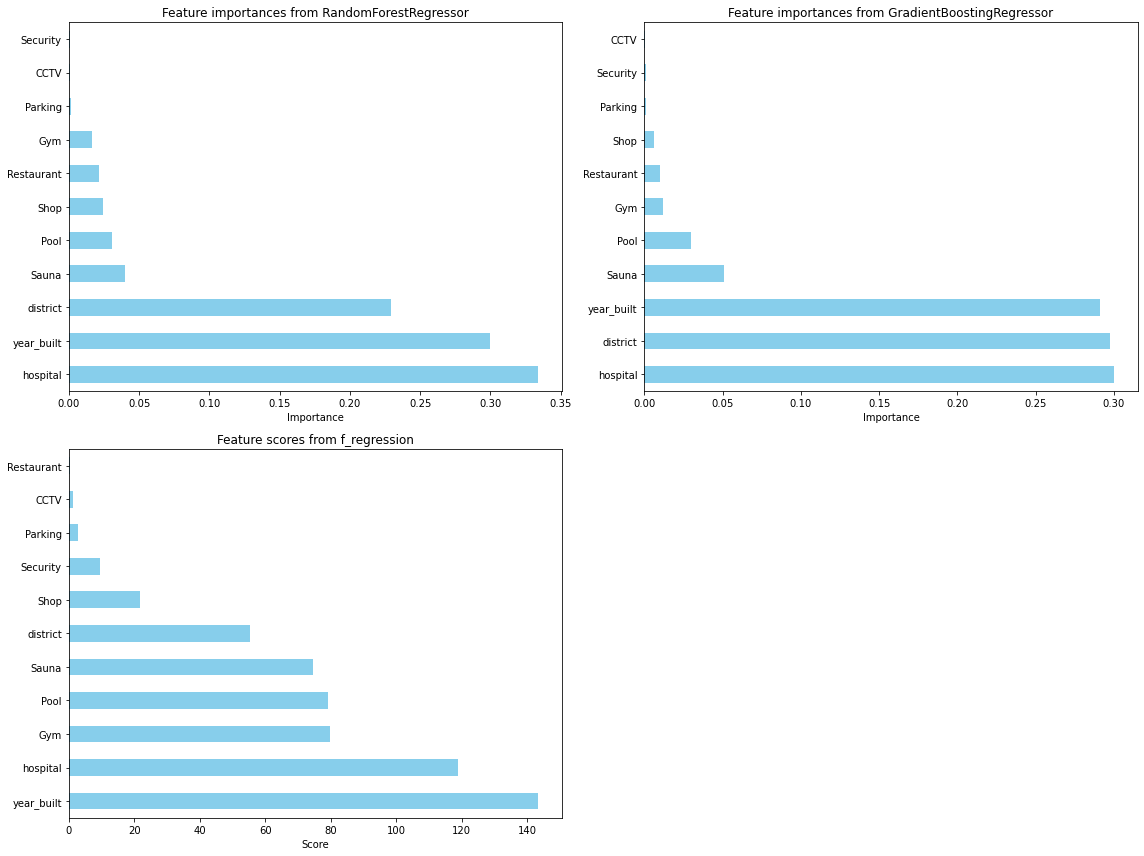

In [70]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
rf_feature_importances.plot(kind='barh', color='skyblue')
plt.title('Feature importances from RandomForestRegressor')
plt.xlabel('Importance')

plt.subplot(2, 2, 2)
gb_feature_importances.plot(kind='barh', color='skyblue')
plt.title('Feature importances from GradientBoostingRegressor')
plt.xlabel('Importance')

plt.subplot(2, 2, 3)
f_feature_scores.plot(kind='barh', color='skyblue')
plt.title('Feature scores from f_regression')
plt.xlabel('Score')

plt.tight_layout()
plt.show()


In [73]:
##cross validatio - ML model evaluation: 
from sklearn.model_selection import cross_val_score

# RandomForestRegressor with cross-validation
rf_model_cv = RandomForestRegressor(n_estimators=100, random_state=0)
rf_cv_scores = cross_val_score(rf_model_cv, X, y, cv=5)  # 5-fold cross-validation

#GradientBoostingRegressor with cross-validation
gb_model_cv = GradientBoostingRegressor(random_state=0)
gb_cv_scores = cross_val_score(gb_model_cv, X, y, cv=5)  # 5-fold cross-validation

print("RandomForestRegressor Cross-validation scores:", rf_cv_scores)
print("RandomForestRegressor Average cross-validation score: {:.2f}".format(rf_cv_scores.mean()))

print("GradientBoostingRegressor Cross-validation scores:", gb_cv_scores)
print("GradientBoostingRegressor Average cross-validation score: {:.2f}".format(gb_cv_scores.mean()))



RandomForestRegressor Cross-validation scores: [0.09629229 0.03775029 0.24626463 0.3322274  0.21723508]
RandomForestRegressor Average cross-validation score: 0.19
GradientBoostingRegressor Cross-validation scores: [ 0.06834229  0.1584168   0.28012386  0.31017766 -0.22046958]
GradientBoostingRegressor Average cross-validation score: 0.12


In [76]:
print('Feature importances from RandomForestRegressor:\n', rf_feature_importances)
print('-------------------------')
print('Feature importances from GradientBoostingRegressor:\n', gb_feature_importances)
print('-------------------------')
print('Feature scores from f_regression:\n', feature_scores)

Feature importances from RandomForestRegressor:
 hospital      0.334198
year_built    0.300029
district      0.229540
Sauna         0.039981
Pool          0.030822
Shop          0.024537
Restaurant    0.021558
Gym           0.016659
Parking       0.001269
CCTV          0.000743
Security      0.000663
dtype: float64
-------------------------
Feature importances from GradientBoostingRegressor:
 hospital      0.300119
district      0.297789
year_built    0.291413
Sauna         0.050881
Pool          0.029719
Gym           0.011892
Restaurant    0.009596
Shop          0.005920
Parking       0.001149
Security      0.000923
CCTV          0.000599
dtype: float64
-------------------------
Feature scores from f_regression:
 year_built    196.284381
hospital      165.407214
Pool          111.737248
Gym           104.646780
Sauna          99.588211
district       62.265227
Shop           32.393530
Security        9.371085
Parking         2.949290
CCTV            0.417753
Restaurant      0.336188
